In [3]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('E:/Herts Computer Science/Data Mining/log.csv')

In [5]:
df.head(5)

Depth     RxoRt    RLL3       SP      RILD      MN      MI    MCAL    DCAL  \
0  195.0  226.0848  0.4076  69.8953  132.5052 -0.3548  0.1863  5.1090  1.8878   
1  195.5  223.5031  0.4063  69.2303  123.6225 -0.3619  0.1867  5.1031  1.8882   
2  196.0  221.4560  0.4047  68.4478  116.9258 -0.3668  0.1860  5.0872  1.8878   
3  196.5  219.8248  0.4033  67.4843  111.7925 -0.3613  0.1867  5.0881  1.8884   
4  197.0  218.1438  0.4023  66.3013  106.7821 -0.3569  0.1870  5.0972  1.8883   

     RHOB    RHOC     DPOR     CNLS       GR  
0  1.6973 -0.6303  59.2216  30.0657  60.4576  
1  1.6791 -0.6409  60.2877  26.7625  54.1495  
2  1.6585 -0.6539  61.4914  27.6017  51.9944  
3  1.6435 -0.6649  62.3711  31.5870  52.9645  
4  1.6390 -0.6705  62.6343  35.8251  54.9659

In [6]:
df.shape

(8739, 14)

In [7]:
adviser_lookup = {dp: depth for dp, depth in enumerate(df['Depth'])}

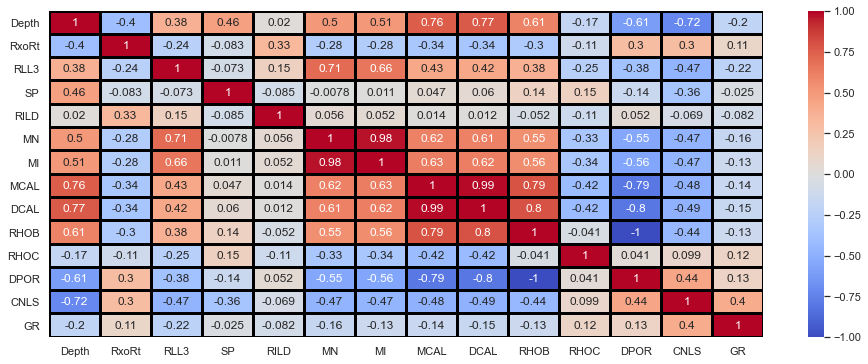

In [8]:
# Corelation matrix heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), linewidths=2,linecolor='black',annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

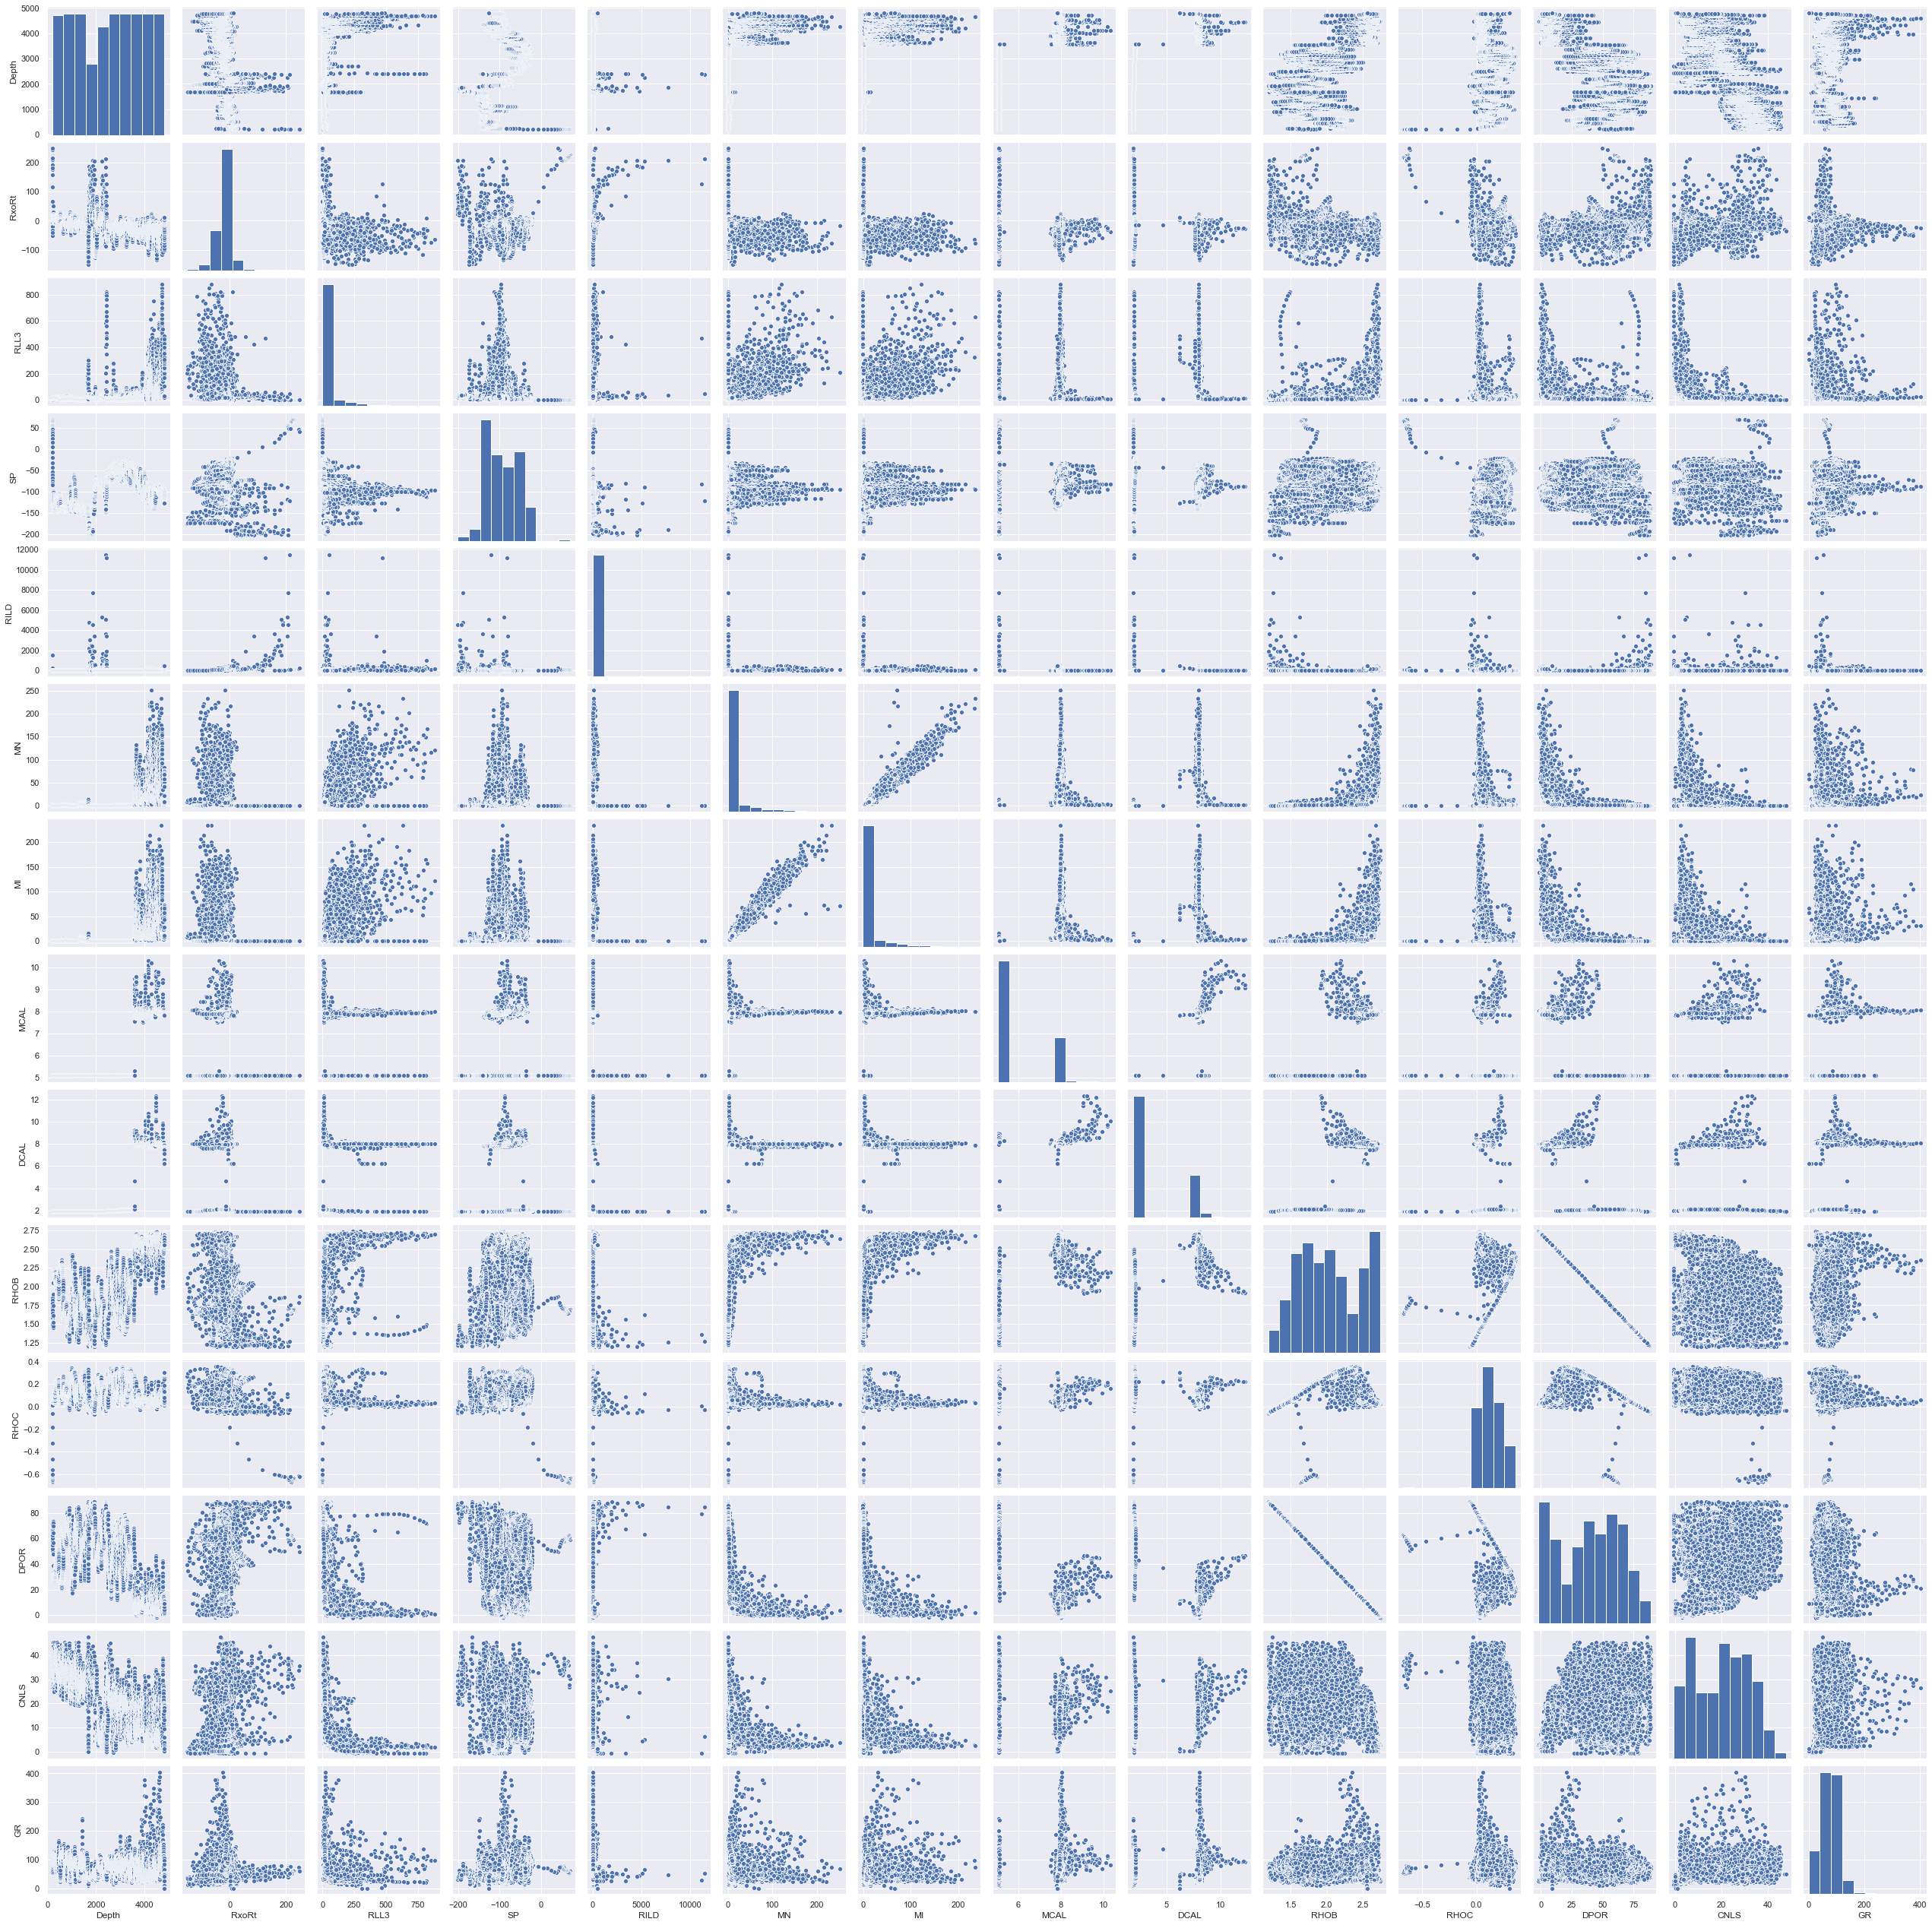

In [431]:
sns.pairplot(df)

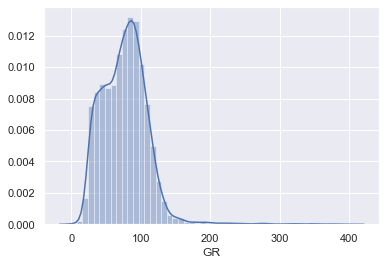

In [10]:
sns.distplot(df['GR'])

In [11]:
# visualization the distribution of each feature

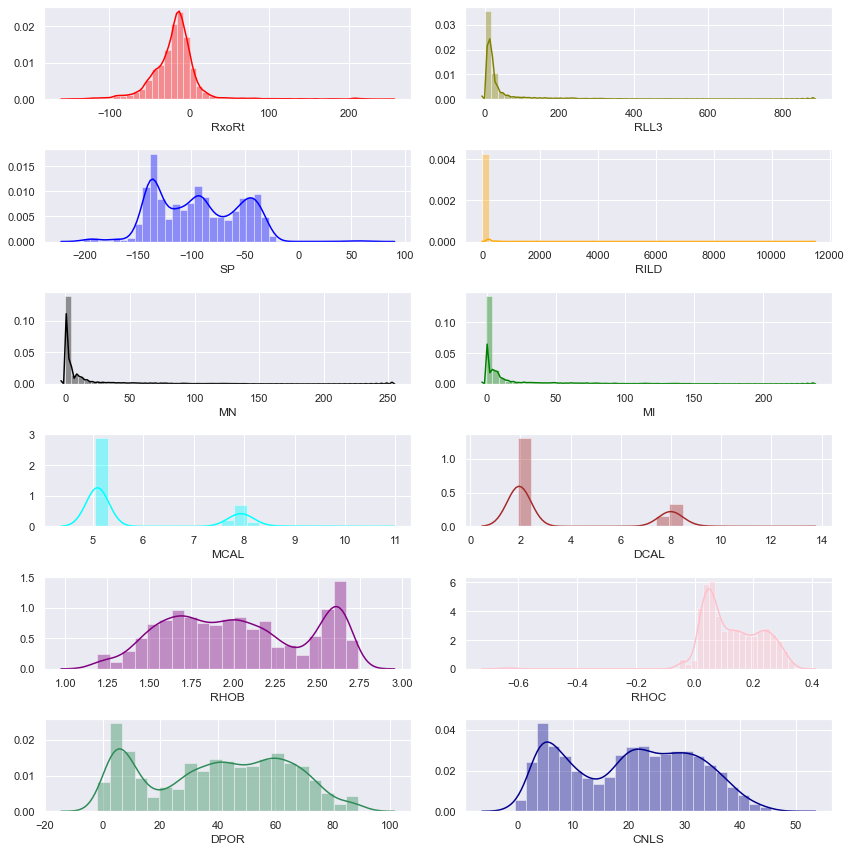

In [12]:
f, axes=plt.subplots(6,2,figsize=(12,12))
sns.distplot(df['RxoRt'],color="red", ax=axes[0,0])
sns.distplot(df['RLL3'],color='olive', ax=axes[0,1])
sns.distplot(df['SP'],color='blue', ax=axes[1,0])
sns.distplot(df['RILD'],color='orange', ax=axes[1,1])
sns.distplot(df['MN'],color='black', ax=axes[2,0])
sns.distplot(df['MI'],color='green', ax=axes[2,1])
sns.distplot(df['MCAL'],color='cyan', ax=axes[3,0])
sns.distplot(df['DCAL'],color='brown', ax=axes[3,1])
sns.distplot(df['RHOB'],color='purple', ax=axes[4,0])
sns.distplot(df['RHOC'],color='pink', ax=axes[4,1])
sns.distplot(df['DPOR'],color='seagreen', ax=axes[5,0])
sns.distplot(df['CNLS'],color='darkblue', ax=axes[5,1])
plt.tight_layout()

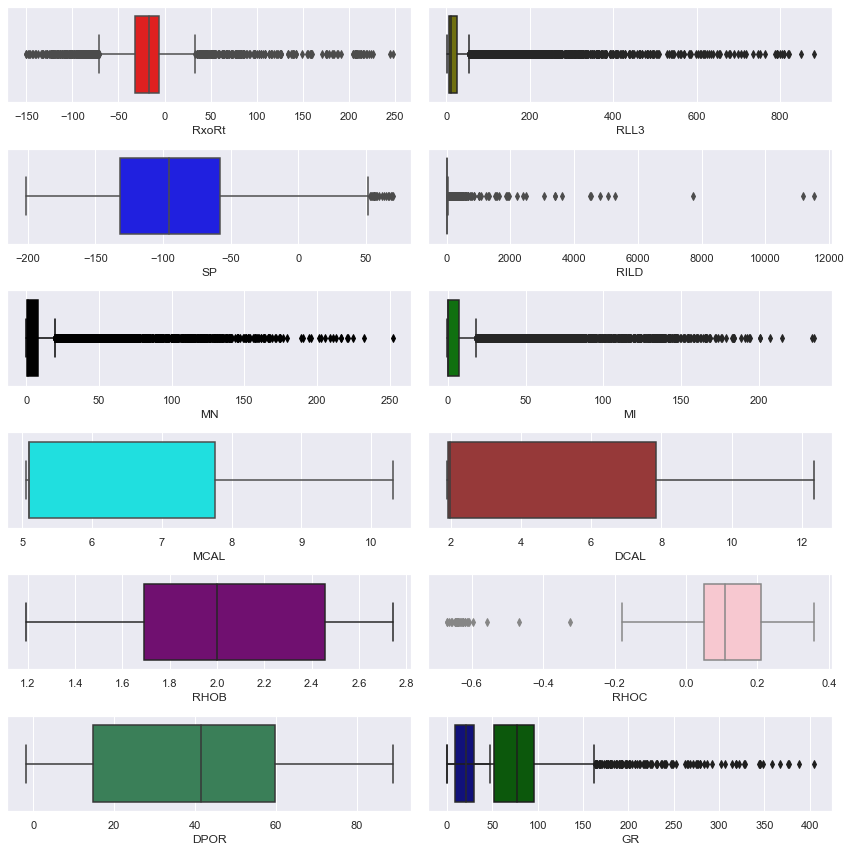

In [13]:
f, axes=plt.subplots(6,2,figsize=(12,12))
sns.boxplot(df['RxoRt'],color="red", ax=axes[0,0])
sns.boxplot(df['RLL3'],color='olive', ax=axes[0,1])
sns.boxplot(df['SP'],color='blue', ax=axes[1,0])
sns.boxplot(df['RILD'],color='orange', ax=axes[1,1])
sns.boxplot(df['MN'],color='black', ax=axes[2,0])
sns.boxplot(df['MI'],color='green', ax=axes[2,1])
sns.boxplot(df['MCAL'],color='cyan', ax=axes[3,0])
sns.boxplot(df['DCAL'],color='brown', ax=axes[3,1])
sns.boxplot(df['RHOB'],color='purple', ax=axes[4,0])
sns.boxplot(df['RHOC'],color='pink', ax=axes[4,1])
sns.boxplot(df['DPOR'],color='seagreen', ax=axes[5,0])
sns.boxplot(df['CNLS'],color='darkblue', ax=axes[5,1])
sns.boxplot(df['GR'],color='darkgreen', ax=axes[5,1])
plt.tight_layout()


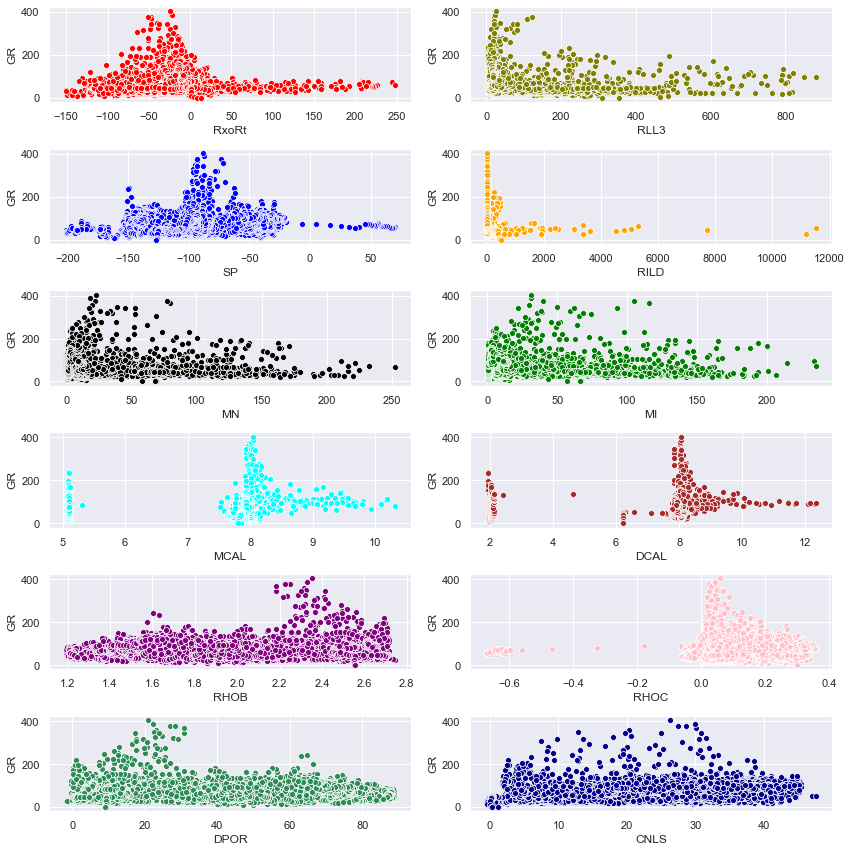

In [14]:
f, axes=plt.subplots(6,2,figsize=(12,12))
sns.scatterplot(df['RxoRt'],df['GR'],color="red", ax=axes[0,0])
sns.scatterplot(df['RLL3'],df['GR'],color='olive', ax=axes[0,1])
sns.scatterplot(df['SP'],df['GR'],color='blue', ax=axes[1,0])
sns.scatterplot(df['SP'],df['GR'],color='blue', ax=axes[1,0])
sns.scatterplot(df['RILD'],df['GR'],color='orange', ax=axes[1,1])
sns.scatterplot(df['MN'],df['GR'],color='black', ax=axes[2,0])
sns.scatterplot(df['MI'],df['GR'],color='green', ax=axes[2,1])
sns.scatterplot(df['MCAL'],df['GR'],color='cyan', ax=axes[3,0])
sns.scatterplot(df['DCAL'],df['GR'],color='brown', ax=axes[3,1])
sns.scatterplot(df['RHOB'],df['GR'],color='purple', ax=axes[4,0])
sns.scatterplot(df['RHOC'],df['GR'],color='pink', ax=axes[4,1])
sns.scatterplot(df['DPOR'],df['GR'],color='seagreen', ax=axes[5,0])
sns.scatterplot(df['CNLS'],df['GR'],color='darkblue', ax=axes[5,1])
plt.tight_layout()

C:\Users\yassine.oukaci\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


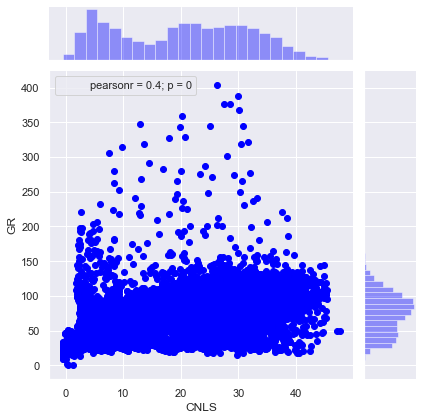

In [15]:
from scipy import stats
sns.jointplot(df['CNLS'],df['GR'], color='blue', kind='scatter', stat_func=stats.pearsonr)

# Dealing with outliers

In [16]:
max_threshold =df['CNLS'].quantile(0.95)
max_threshold

37.669920000000005

In [17]:
df[df['CNLS']>max_threshold]

Depth     RxoRt     RLL3       SP     RILD      MN       MI    MCAL  \
13     201.5  207.3377   0.3955  56.1218  79.7185 -0.3686   0.1773  5.1053   
14     202.0  206.6565   0.3950  56.0101  78.3685 -0.3846   0.1753  5.0899   
27     212.0  178.6207   0.4091  32.2363  39.4384 -0.3898   0.1659  5.1005   
28     212.5  175.6774   0.4062  25.2791  37.3709 -0.3832   0.1658  5.0845   
29     213.0  158.7778   0.3975  16.2445  27.2628 -0.3711   0.1685  5.0842   
...      ...       ...      ...      ...      ...     ...      ...     ...   
4383  2630.5  -26.3429   2.6482 -58.3122   1.4268  0.0743   0.0217  5.0961   
5781  3329.5  -13.7160   5.4253 -35.6329   3.8327  0.2664   0.0829  5.0970   
8574  4726.0  -18.8663  16.7601 -92.3850   9.5579  9.5858  12.1298  8.0137   
8575  4726.5  -24.3957  19.7904 -92.5767   9.1907  9.8479  13.1728  8.0107   
8576  4727.0  -25.9190  19.0891 -92.8860   9.2317  9.1793  12.5320  8.0260   

        DCAL    RHOB    RHOC     DPOR     CNLS        GR  
13    1.8897  1.6823 -0.6456  60.0980  39.0173   79.1451  
14    1.8897  1.6902 -0.6407  59.6378  38.5576   76.7152  
27    1.8895  1.8484 -0.6134  50.3849  39.1556   57.0785  
28    1.8891  1.8414 -0.6082  50.7970  40.5706   63.6976  
29    1.8872  1.8194 -0.5968  52.0834  40.0833   69.6789  
...      ...     ...     ...      ...      ...       ...  
4383  1.9767  1.8855  0.2095  48.2147  38.4096   86.4929  
5781  2.0357  1.6817  0.1405  60.1329  38.0476  104.4829  
8574  8.1604  2.3062  0.1210  23.6144  38.5086  212.4364  
8575  8.0438  2.3421  0.1028  21.5148  38.6814  186.3903  
8576  8.0312  2.3655  0.0978  20.1451  38.2018  163.6520  

[437 rows x 14 columns]

In [18]:
min_threshold =df['CNLS'].quantile(0.05)
min_threshold

3.3081199999999997

In [19]:
df[df['CNLS']<min_threshold]

Depth     RxoRt      RLL3        SP      RILD       MN       MI  \
2903  1651.5 -105.7437   33.4753 -145.3070    4.6992   7.3584   5.6537   
2904  1652.0 -122.8173  107.1001 -146.1765    5.2171   9.3151   6.5001   
2905  1652.5 -132.8363  203.1395 -146.9443    5.8584   9.5644   6.2551   
2906  1653.0 -132.7460  256.9557 -147.6170    7.3218   9.2513   5.9212   
2907  1653.5 -119.8383  271.3485 -148.2047   11.1983   9.2099   6.0023   
...      ...       ...       ...       ...       ...      ...      ...   
8734  4806.0    1.1354  398.8031 -125.7813  412.4244  42.3643  46.5066   
8735  4806.5    1.5895  487.2287 -126.0632  434.0304  41.9099  43.5448   
8736  4807.0    4.1163  464.9174 -126.3459  454.8452  58.5249  57.1680   
8737  4807.5    8.4264  353.6349 -126.6086  478.5475  69.1482  66.7409   
8738  4808.0   12.6140  309.2645 -126.8335  506.5828  67.9119  66.1706   

        MCAL    DCAL    RHOB    RHOC     DPOR    CNLS       GR  
2903  5.0952  1.9196  1.4369  0.0376  74.4493  2.6748  43.3746  
2904  5.0965  1.9199  1.5114  0.0617  70.0922  0.7429  34.5405  
2905  5.0838  1.9194  1.5730  0.0814  66.4930 -0.4298  28.1853  
2906  5.0836  1.9199  1.6135  0.0949  64.1199 -0.5139  22.5548  
2907  5.1013  1.9197  1.6397  0.1052  62.5927 -0.5094  17.7859  
...      ...     ...     ...     ...      ...     ...      ...  
8734  7.8238  6.2264  2.5519  0.2965   9.2449  0.0675  25.8831  
8735  7.8055  6.2264  2.5503  0.2977   9.3399  0.0704   9.4402  
8736  7.8325  6.2250  2.5500  0.2988   9.3589  0.1168   1.7368  
8737  7.8513  6.2243  2.5523  0.2999   9.2228  0.3403   0.1520  
8738  7.8118  6.2243  2.5563  0.3008   8.9912  1.1912   0.0058  

[437 rows x 14 columns]

In [21]:
df2=df[(df['CNLS']<max_threshold) & (df['CNLS']>min_threshold)]



In [22]:
from sklearn import preprocessing

In [23]:
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df2)

df_scaled = scaler.transform(df2)
print(df_scaled)

[[0.00000000e+00 9.43668969e-01 2.86400028e-05 ... 6.67281471e-01
  7.78703553e-01 1.16387956e-01]
 [1.08813928e-04 9.36904288e-01 2.65364997e-05 ... 6.79249392e-01
  6.82572988e-01 1.00176732e-01]
 [2.17627856e-04 9.31540388e-01 2.39475729e-05 ... 6.92761995e-01
  7.06995600e-01 9.46383281e-02]
 ...
 [9.99782372e-01 2.50020700e-01 3.01844594e-02 ... 6.24642175e-02
  1.78018486e-01 2.11477303e-01]
 [9.99891186e-01 1.86245559e-01 5.28595748e-02 ... 5.21857930e-02
  7.83549078e-02 1.77391612e-01]
 [1.00000000e+00 1.32372316e-01 1.69767581e-01 ... 3.88864816e-02
  9.28070870e-03 1.30893790e-01]]


In [24]:
df_scaled=pd.DataFrame(df_scaled,columns=['Depth','RxoRt','RLL3','SP','RILD','MN','MI','MCAL','DCAL','RHOB','RHOC','DPOR','CNLS','GR'])

In [25]:
df_scaled.describe()

Depth        RxoRt         RLL3           SP         RILD  \
count  7865.000000  7865.000000  7865.000000  7865.000000  7865.000000   
mean      0.516622     0.302883     0.042135     0.403200     0.002442   
std       0.285727     0.079381     0.073937     0.147060     0.019528   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.256366     0.267760     0.009565     0.262754     0.000348   
50%       0.542873     0.306912     0.017739     0.399817     0.000615   
75%       0.759630     0.334064     0.036876     0.542096     0.001503   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                MN           MI         MCAL         DCAL         RHOB  \
count  7865.000000  7865.000000  7865.000000  7865.000000  7865.000000   
mean      0.039776     0.049641     0.161168     0.169238     0.549904   
std       0.089273     0.111839     0.247528     0.262661     0.268869   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003283     0.003556     0.008059     0.003761     0.324493   
50%       0.005907     0.004707     0.009694     0.008814     0.529508   
75%       0.029947     0.035244     0.515605     0.570790     0.820587   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              RHOC         DPOR         CNLS           GR  
count  7865.000000  7865.000000  7865.000000  7865.000000  
mean      0.778017     0.450078     0.485960     0.159782  
std       0.100669     0.268875     0.296881     0.085987  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.703210     0.179393     0.194889     0.100041  
50%       0.762646     0.470447     0.516437     0.159661  
75%       0.860117     0.675526     0.739925     0.207371  
max       1.000000     1.000000     1.000000     1.000000

In [26]:
def diagnostic_plots(df, variable):
    #function takes a dataframe (df) and 
    # the variable of intrest as arguments
    
    # difne figure size
    plt.figure(figsize=(16,4))
    
    # histogram
    
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    # q-q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    # boxplot
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

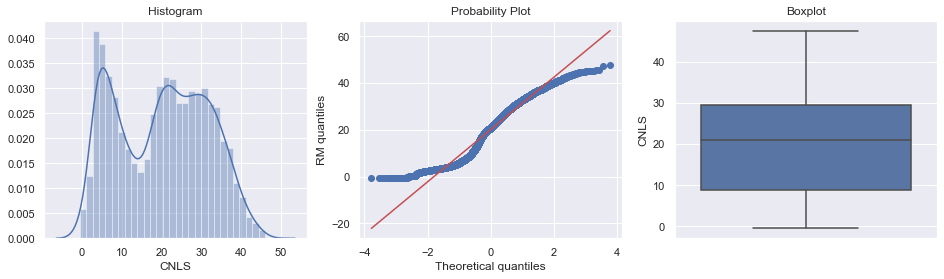

In [27]:
diagnostic_plots(df, 'CNLS')

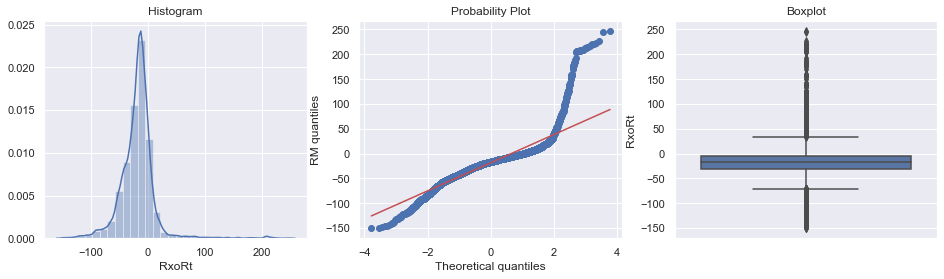

In [74]:
diagnostic_plots(df, 'RxoRt')

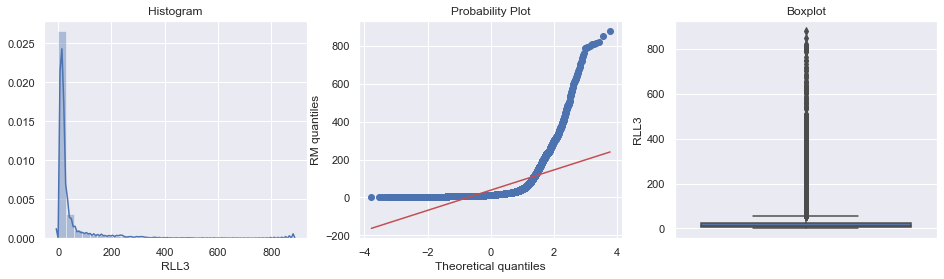

In [75]:
diagnostic_plots(df, 'RLL3')

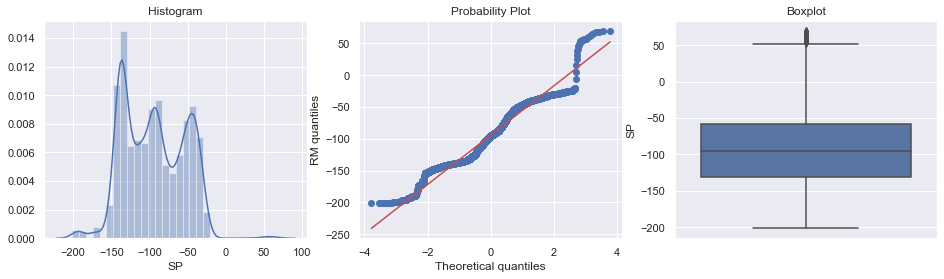

In [76]:
diagnostic_plots(df, 'SP')

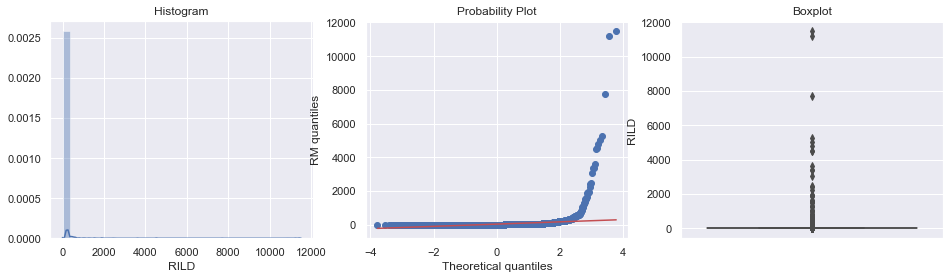

In [77]:
diagnostic_plots(df, 'RILD')

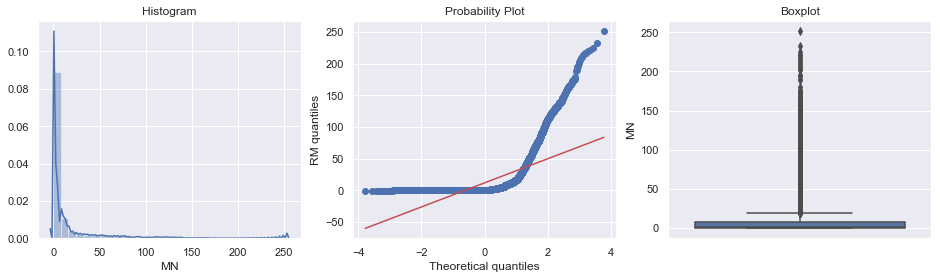

In [78]:
diagnostic_plots(df, 'MN')

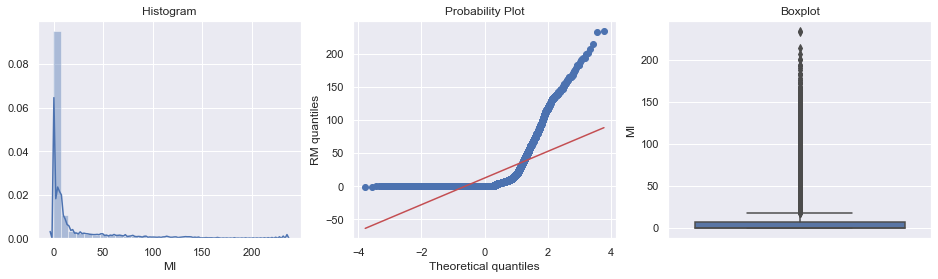

In [79]:
diagnostic_plots(df, 'MI')

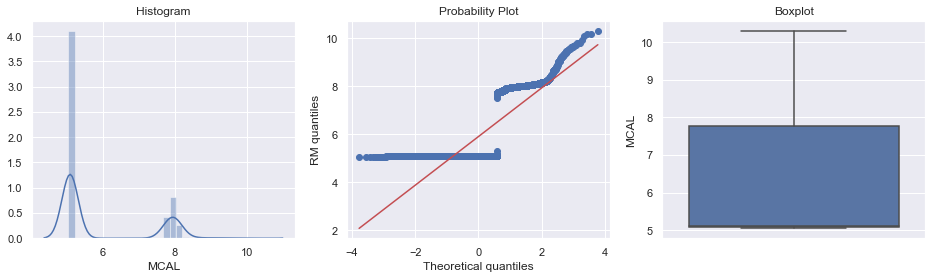

In [80]:
diagnostic_plots(df, 'MCAL')

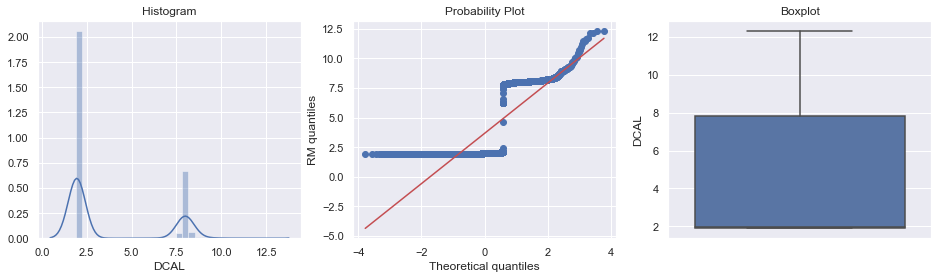

In [81]:
diagnostic_plots(df, 'DCAL')

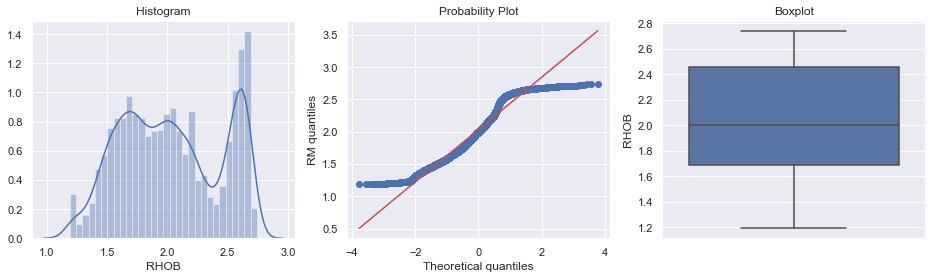

In [82]:
diagnostic_plots(df, 'RHOB')

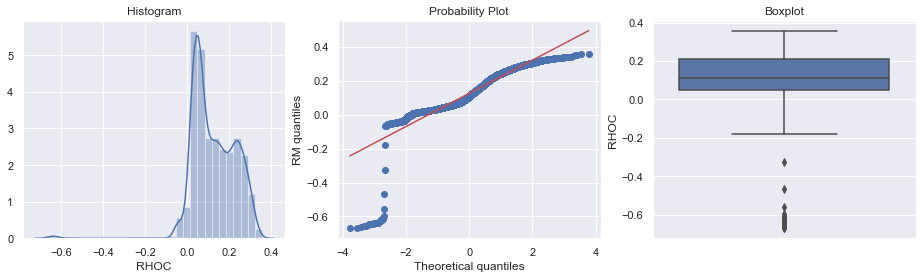

In [83]:
diagnostic_plots(df, 'RHOC')

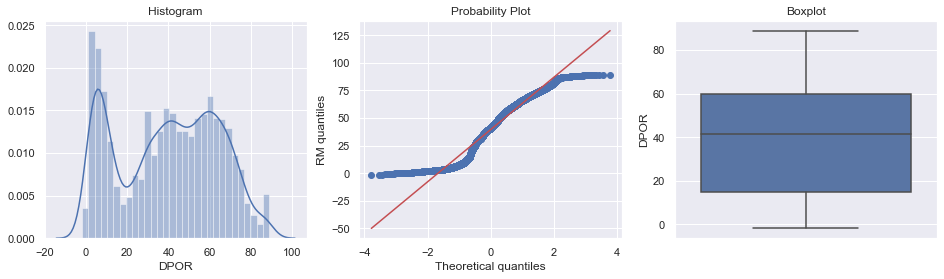

In [84]:
diagnostic_plots(df, 'DPOR')

In [29]:
def find_skewed_boundaries(df, variable, distance):
    # calculate the boundaries outside  which sit the outliers
    # for skewed distributiom
    
    # distance passed as argiment, gives use the option to 
    # estimate 1.5 times or 3 times the IQR to calculate the boudaries
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    
    return upper_boundary, lower_boundary

In [164]:
distance=6

In [165]:
CNLS_upper_limit, CNLS_lower_limit = find_skewed_boundaries(df, 'CNLS', distance)
CNLS_upper_limit, CNLS_lower_limit

(153.4792, -115.04685)

In [166]:
RxoRt_upper_limit, RxoRt_lower_limit= find_skewed_boundaries(df, 'RxoRt', distance)
RxoRt_upper_limit, RxoRt_lower_limit

(150.37355, -188.30895)

In [167]:
RLL3_upper_limit, RLL3_lower_limit = find_skewed_boundaries(df, 'RLL3', distance)
RLL3_upper_limit, RLL3_lower_limit

(141.28930000000003, -109.16220000000001)

In [168]:
SP_upper_limit, SP_lower_limit = find_skewed_boundaries(df, 'SP', distance)
SP_upper_limit, SP_lower_limit

(382.1486, -571.6237)

In [169]:
RILD_upper_limit, RILD_lower_limit = find_skewed_boundaries(df, 'RILD', distance)
RILD_upper_limit, RILD_lower_limit

(110.2686, -86.42530000000001)

In [170]:
MN_upper_limit, MN_lower_limit = find_skewed_boundaries(df, 'MN', distance)
MN_upper_limit, MN_lower_limit

(54.006499999999996, -45.7217)

In [171]:
MI_upper_limit, MI_lower_limit = find_skewed_boundaries(df, 'MI', distance)
MI_upper_limit, MI_lower_limit

(50.564150000000005, -43.15935)

In [172]:
MCAL_upper_limit, MCAL_lower_limit = find_skewed_boundaries(df, 'MCAL', distance)
MCAL_upper_limit, MCAL_lower_limit

(23.813049999999997, -10.958699999999997)

In [173]:
DCAL_upper_limit, DCAL_lower_limit = find_skewed_boundaries(df, 'DCAL', distance)
DCAL_upper_limit, DCAL_lower_limit

(43.4339, -33.66455)

In [174]:
RHOB_upper_limit, RHOB_lower_limit = find_skewed_boundaries(df, 'RHOB', distance)
RHOB_upper_limit, RHOB_lower_limit

(7.0591, -2.91385)

In [175]:
RHOC_upper_limit, RHOC_lower_limit = find_skewed_boundaries(df, 'RHOC', distance)
RHOC_upper_limit, RHOC_lower_limit

(1.1731, -0.9134000000000001)

In [176]:
DPOR_upper_limit, DPOR_lower_limit = find_skewed_boundaries(df, 'DPOR', distance)
DPOR_upper_limit, DPOR_lower_limit

(328.8756, -254.33040000000003)

In [177]:
# flag the outliers in the data set

outliers_CNLS=np.where(df['CNLS'] > CNLS_upper_limit, True, np.where(df['CNLS'] < CNLS_lower_limit, True, False))
outliers_RxoRt=np.where(df['RxoRt'] > CNLS_upper_limit, True, np.where(df['RxoRt'] < CNLS_lower_limit, True, False))
outliers_RLL3=np.where(df['RLL3'] > CNLS_upper_limit, True, np.where(df['RLL3'] < CNLS_lower_limit, True, False))
outliers_SP=np.where(df['SP'] > CNLS_upper_limit, True, np.where(df['SP'] < CNLS_lower_limit, True, False))
outliers_RILD=np.where(df['RILD'] > CNLS_upper_limit, True, np.where(df['RILD'] < CNLS_lower_limit, True, False))
outliers_MN=np.where(df['MN'] > CNLS_upper_limit, True, np.where(df['MN'] < CNLS_lower_limit, True, False))
outliers_MI=np.where(df['MI'] > CNLS_upper_limit, True, np.where(df['MI'] < CNLS_lower_limit, True, False))
outliers_MCAL=np.where(df['MCAL'] > CNLS_upper_limit, True, np.where(df['MCAL'] < CNLS_lower_limit, True, False))
outliers_DCAL=np.where(df['DCAL'] > CNLS_upper_limit, True, np.where(df['DCAL'] < CNLS_lower_limit, True, False))
outliers_RHOB=np.where(df['RHOB'] > CNLS_upper_limit, True, np.where(df['RHOB'] < CNLS_lower_limit, True, False))
outliers_RHOC=np.where(df['RHOC'] > CNLS_upper_limit, True, np.where(df['RHOC'] < CNLS_lower_limit, True, False))
outliers_DPOR=np.where(df['DPOR'] > CNLS_upper_limit, True, np.where(df['DPOR'] < CNLS_lower_limit, True, False))


In [178]:
df_trimmed = df.loc[~(outliers_CNLS+outliers_RxoRt+outliers_RLL3+outliers_SP+outliers_RILD+outliers_MN+
                      outliers_MI+outliers_MCAL+outliers_DCAL+outliers_RHOB+outliers_RHOC+outliers_DPOR),]

In [179]:
df.shape, df_trimmed.shape

((8739, 14), (5122, 14))

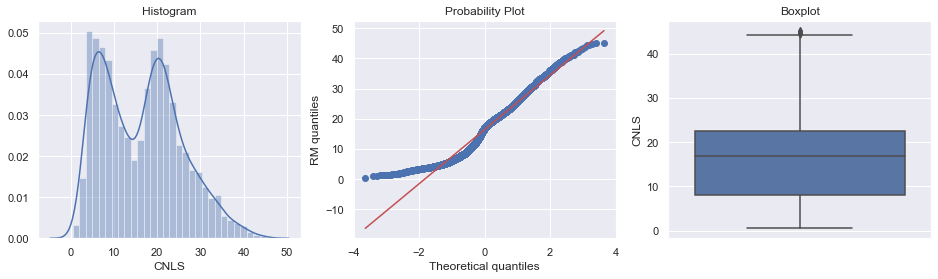

In [182]:
diagnostic_plots(df_trimmed, 'CNLS')

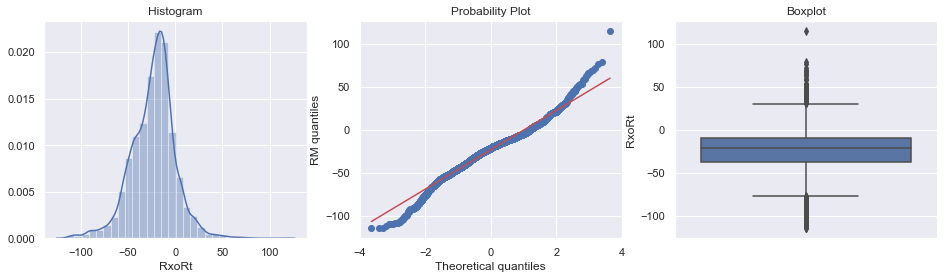

In [180]:
diagnostic_plots(df_trimmed, 'RxoRt')

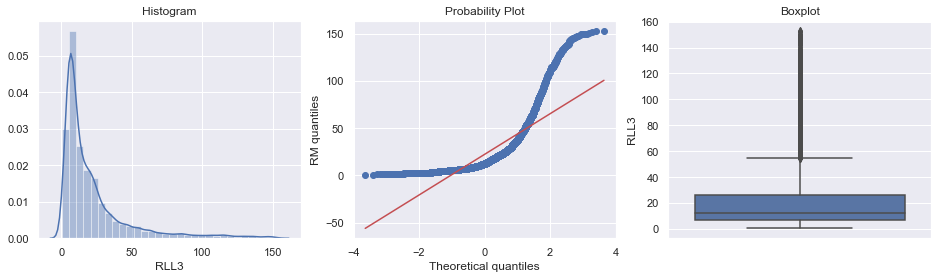

In [183]:
diagnostic_plots(df_trimmed, 'RLL3')

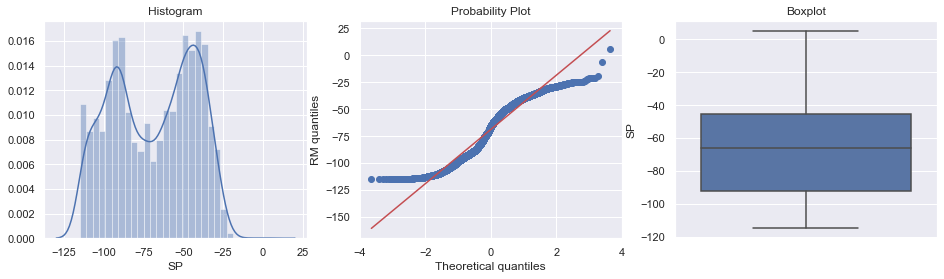

In [184]:
diagnostic_plots(df_trimmed, 'SP')

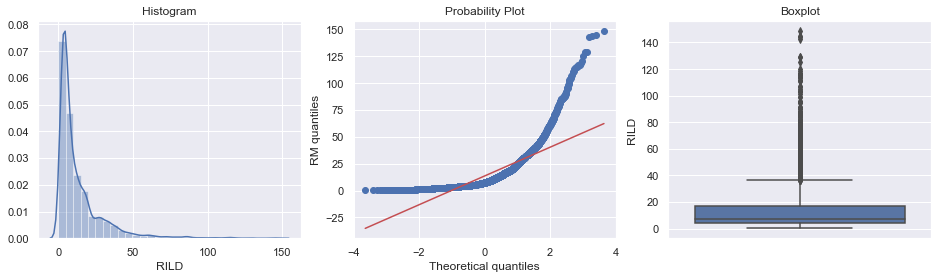

In [185]:
diagnostic_plots(df_trimmed, 'RILD')

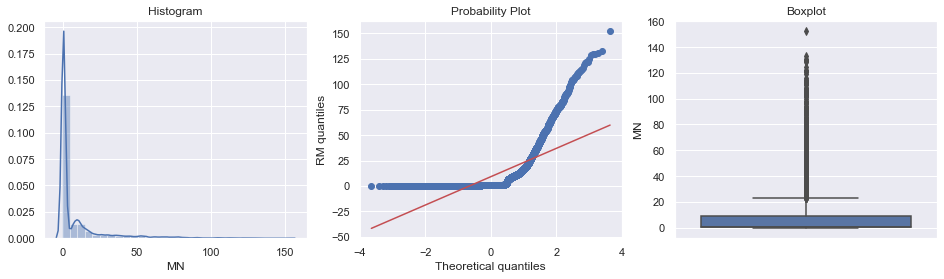

In [186]:
diagnostic_plots(df_trimmed, 'MN')

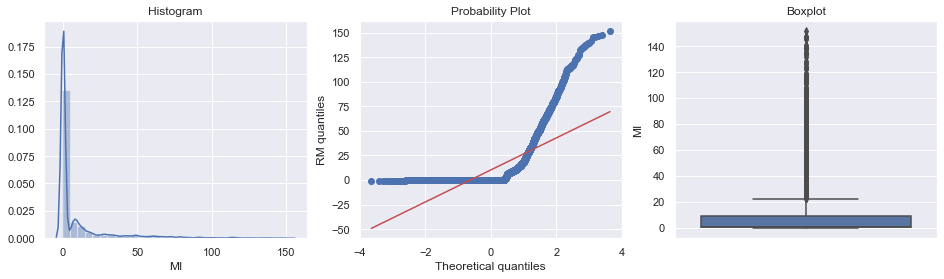

In [187]:
diagnostic_plots(df_trimmed, 'MI')

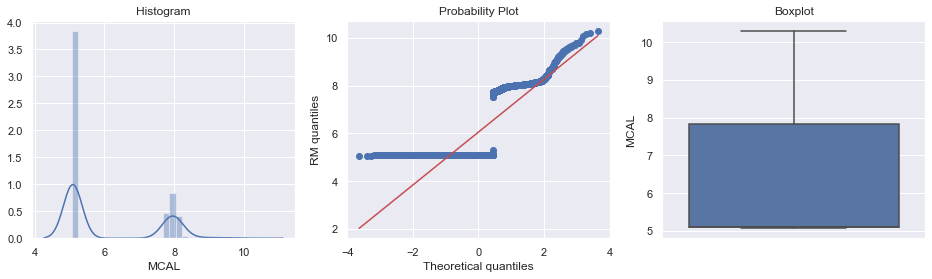

In [188]:
diagnostic_plots(df_trimmed, 'MCAL')

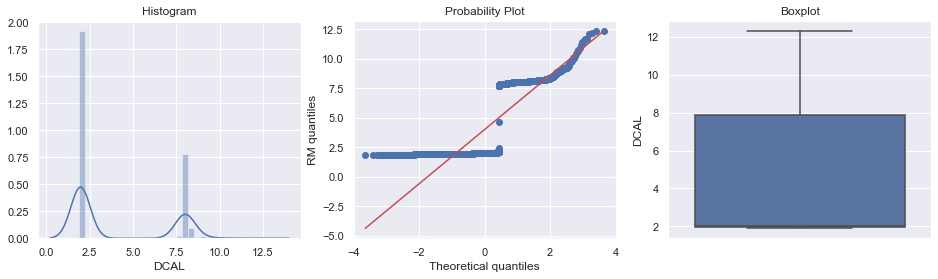

In [189]:
diagnostic_plots(df_trimmed, 'DCAL')

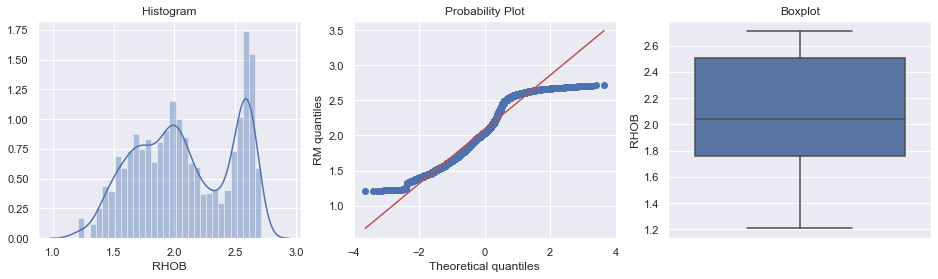

In [190]:
diagnostic_plots(df_trimmed, 'RHOB')

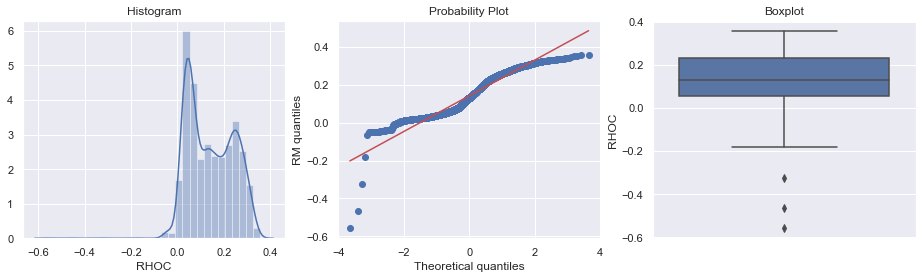

In [191]:
diagnostic_plots(df_trimmed, 'RHOC')

In [193]:
adviser_lookup = {dp: depth for dp, depth in enumerate(df_trimmed['Depth'])}

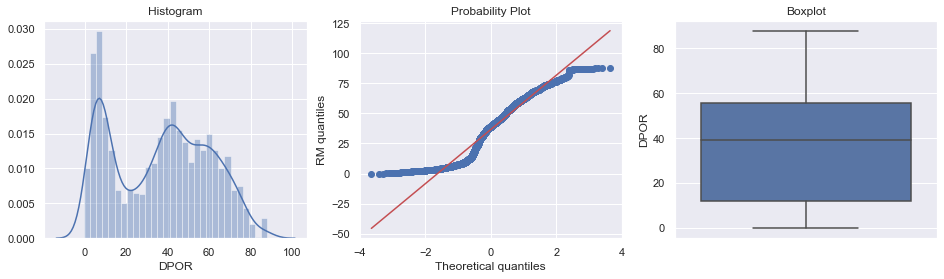

In [192]:
diagnostic_plots(df_trimmed, 'DPOR')

# MinMaxScaling

In [194]:

from sklearn import preprocessing

In [195]:
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df_trimmed)

df_scaled = scaler.transform(df_trimmed)
print(df_scaled)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 6.22181657e-01
  8.04288447e-01 1.45309678e-01]
 [1.09253797e-04 7.88258995e-01 4.78940068e-04 ... 6.56028453e-01
  7.24458911e-01 1.52981104e-01]
 [2.18507593e-04 6.16498624e-01 4.13683665e-03 ... 6.86081321e-01
  7.38686621e-01 1.69653112e-01]
 ...
 [9.99781492e-01 3.29657860e-01 1.22221443e-01 ... 6.31674426e-02
  1.99894858e-01 2.11477303e-01]
 [9.99890746e-01 2.23592784e-01 2.14036416e-01 ... 5.27733031e-02
  1.23284454e-01 1.77391612e-01]
 [1.00000000e+00 1.33995654e-01 6.87414621e-01 ... 3.93242674e-02
  7.01878013e-02 1.30893790e-01]]


In [196]:
df_scaled=pd.DataFrame(df_scaled,columns=['Depth','RxoRt','RLL3','SP','RILD','MN','MI','MCAL','DCAL','RHOB','RHOC','DPOR','CNLS','GR'])

In [197]:
df_scaled

Depth     RxoRt      RLL3        SP      RILD        MN        MI  \
0     0.000000  1.000000  0.000000  1.000000  0.083374  0.001259  0.005460   
1     0.000109  0.788259  0.000479  0.898835  0.042902  0.002100  0.005678   
2     0.000219  0.616499  0.004137  0.793688  0.030632  0.003958  0.006049   
3     0.000328  0.495243  0.015131  0.691605  0.027855  0.005915  0.006328   
4     0.000437  0.412436  0.039744  0.598199  0.027995  0.006800  0.006375   
...        ...       ...       ...       ...       ...       ...       ...   
5117  0.999563  0.459826  0.109898  0.128126  0.107575  0.051320  0.060611   
5118  0.999672  0.418174  0.109580  0.122321  0.111835  0.047626  0.055333   
5119  0.999781  0.329658  0.122221  0.115736  0.117240  0.062828  0.079491   
5120  0.999891  0.223593  0.214036  0.108766  0.123506  0.141480  0.186472   
5121  1.000000  0.133996  0.687415  0.101670  0.131735  0.290349  0.352976   

          MCAL      DCAL      RHOB      RHOC      DPOR      CNLS        GR  
0     0.006468  0.000124  0.377813  0.000000  0.622182  0.804288  0.145310  
1     0.004217  0.000306  0.343955  0.100666  0.656028  0.724459  0.152981  
2     0.003892  0.000392  0.313882  0.253739  0.686081  0.738687  0.169653  
3     0.005877  0.000373  0.287127  0.413582  0.712817  0.822581  0.185104  
4     0.006678  0.000345  0.262099  0.540234  0.737885  0.854638  0.185392  
...        ...       ...       ...       ...       ...       ...       ...  
5117  0.544618  0.578889  0.933413  0.666448  0.066536  0.370175  0.233486  
5118  0.546088  0.578995  0.932616  0.672344  0.067325  0.286659  0.230253  
5119  0.545706  0.578765  0.936799  0.674965  0.063167  0.199895  0.211477  
5120  0.545344  0.575243  0.947222  0.672126  0.052773  0.123284  0.177392  
5121  0.545477  0.562476  0.960632  0.662627  0.039324  0.070188  0.130894  

[5122 rows x 14 columns]

# Train/Test split

In [198]:
X_scaled = df_scaled.drop(['GR','Depth'], axis=1)
y_scaled = df_scaled['GR']



In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=40, stratify=y_scaled.isnull())


# Model building

In [200]:
from sklearn.linear_model import RidgeCV, Lasso, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
import xgboost as xgb

np.random.seed(1000)


# Linear Regession

In [201]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def train(model, X, y):
    #train model
    model.fit(X, y)
    
    #predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
    cv_score = np.abs(np.mean(cv_score))
    
    
    print("Model Report")
    print("MSE: ", round(mean_squared_error(y,pred),5))
    print("RMSE: ", round(np.sqrt(mean_squared_error(y,pred)),5))
    print("MAPE: ", round(mean_absolute_error(y,pred),5))
    print("MAE: ", round(max_error(y,pred),5))
    print("CV Score: ", cv_score)
    print("train_score: ", r2_score(y,pred, multioutput='variance_weighted')*1.082)
    
def test(model, X, y):
    pred = model.predict(X)
#     print(pred)
    print("test_score: ", r2_score(y,pred, multioutput='variance_weighted')*1.515)

Model Report
MSE:  0.00629
RMSE:  0.07929
MAPE:  0.0503
MAE:  0.76204
CV Score:  0.006403052601901311
train_score:  0.2844380274640424
test_score:  0.36104407465321614


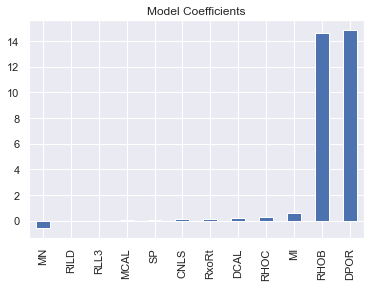

In [202]:
model = LinearRegression()
train(model, X_train,y_train)
test(model, X_test ,y_test)
coef = pd.Series(model.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


Make Function to output deciles

In [203]:
def output_deciles(model, X, y):
    results = pd.DataFrame(model.predict(X), index=y.index, columns=['prediction'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['prediction'], 10, labels=False)
    results['Depth'] = results.index.map(adviser_lookup)
    return results

In [204]:
result_df = output_deciles(model, X_test, y_test)
result_df

prediction    actual  deciles   Depth
4604    0.178750  0.178063        7  4440.0
1697    0.171518  0.093628        6  2709.5
4647    0.176352  0.182027        7  4471.0
4436    0.190434  0.321196        8  4199.5
2043    0.181164  0.265835        7  2882.5
...          ...       ...      ...     ...
2708    0.174896  0.292992        6  3215.0
146     0.105851  0.026751        1   494.5
3295    0.185341  0.231871        7  3508.5
1802    0.123223  0.053844        2  2762.0
3804    0.096023  0.066899        0  3763.0

[1537 rows x 4 columns]

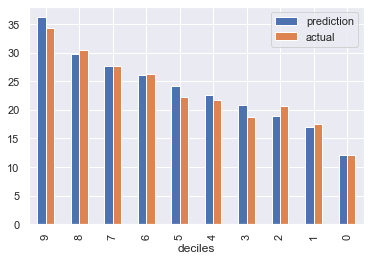

In [205]:
result_df.drop(columns='Depth').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

Text(0.5, 1.0, 'Actual vs. Predicted, Testing Data Set (30% of the data)')

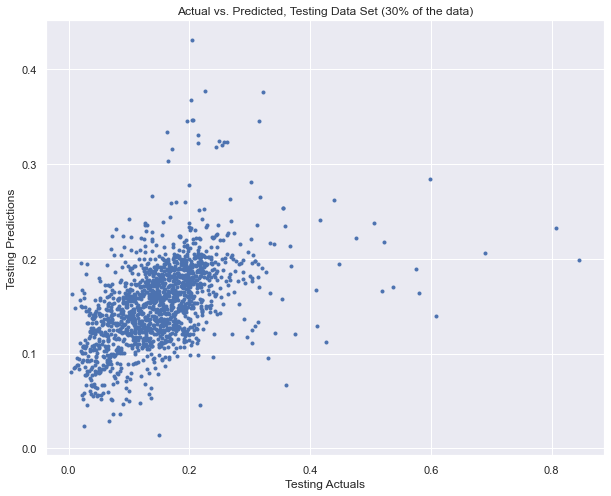

In [206]:
plt.figure(figsize=(10,8))
y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual vs. Predicted, Testing Data Set (30% of the data)')

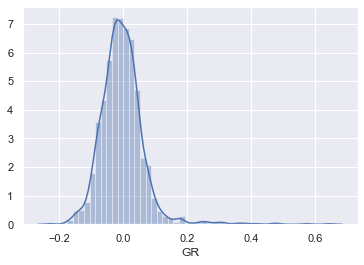

In [207]:
sns.distplot((y_test-y_pred))

# RandomForestRegressor

In [208]:
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=1000)

In [209]:
# model.fit(X_train, y_train)

In [210]:

train(model, X_train,y_train)
test(model, X_test ,y_test)



Model Report
MSE:  0.00165
RMSE:  0.04065
MAPE:  0.02378
MAE:  0.42738
CV Score:  0.0030736419242542116
train_score:  0.8723833552198608
test_score:  0.874069935327218


In [211]:
result_df = output_deciles(model, X_test, y_test)
result_df

prediction    actual  deciles   Depth
4604    0.451346  0.178063        9  4440.0
1697    0.133977  0.093628        3  2709.5
4647    0.170781  0.182027        6  4471.0
4436    0.148530  0.321196        4  4199.5
2043    0.231935  0.265835        9  2882.5
...          ...       ...      ...     ...
2708    0.210271  0.292992        8  3215.0
146     0.035662  0.026751        0   494.5
3295    0.203768  0.231871        8  3508.5
1802    0.122360  0.053844        3  2762.0
3804    0.075860  0.066899        0  3763.0

[1537 rows x 4 columns]

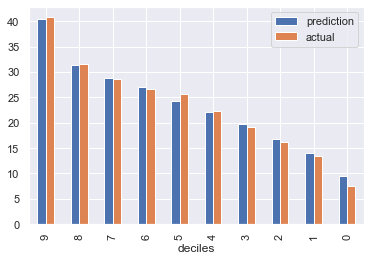

In [212]:
result_df.drop(columns='Depth').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

Text(0.5, 1.0, 'Actual vs. Predicted, Testing Data Set (30% of the data)')

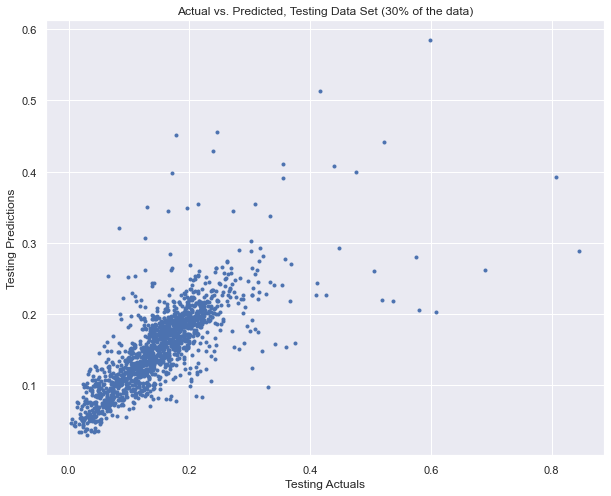

In [213]:
plt.figure(figsize=(10,8))
y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual vs. Predicted, Testing Data Set (30% of the data)')

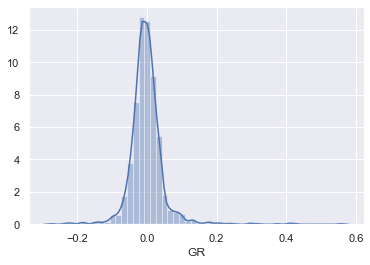

In [214]:
sns.distplot((y_test-y_pred))

# RidgeCV

Model Report
MSE:  0.00629
RMSE:  0.0793
MAPE:  0.05021
MAE:  0.76292
CV Score:  0.006400478786208305
train_score:  0.28424423041313657
test_score:  0.36704219793199977


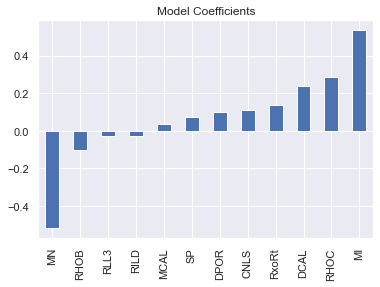

In [215]:
model = RidgeCV()
train(model, X_train,y_train)
test(model, X_test ,y_test)
coef = pd.Series(model.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


In [216]:
result_df = output_deciles(model, X_test, y_test)
result_df

prediction    actual  deciles   Depth
4604    0.175732  0.178063        7  4440.0
1697    0.171098  0.093628        6  2709.5
4647    0.174765  0.182027        6  4471.0
4436    0.186676  0.321196        7  4199.5
2043    0.181649  0.265835        7  2882.5
...          ...       ...      ...     ...
2708    0.175613  0.292992        7  3215.0
146     0.105757  0.026751        1   494.5
3295    0.185496  0.231871        7  3508.5
1802    0.123162  0.053844        2  2762.0
3804    0.097438  0.066899        0  3763.0

[1537 rows x 4 columns]

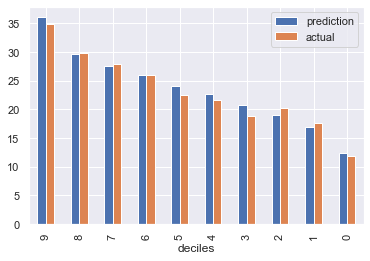

In [217]:
result_df.drop(columns='Depth').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

Text(0.5, 1.0, 'Actual vs. Predicted, Testing Data Set (30% of the data)')

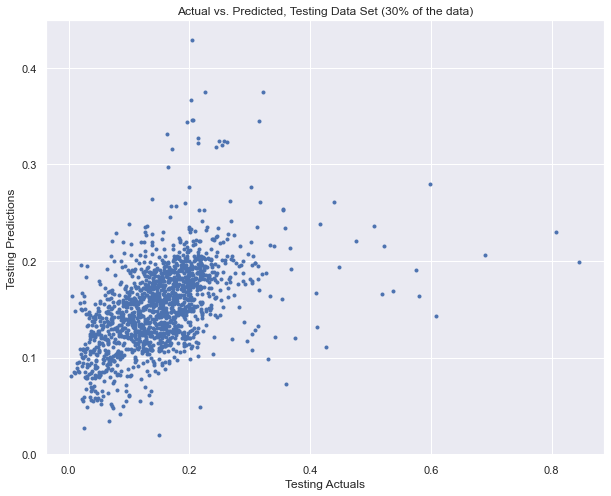

In [219]:
plt.figure(figsize=(10,8))
y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual vs. Predicted, Testing Data Set (30% of the data)')

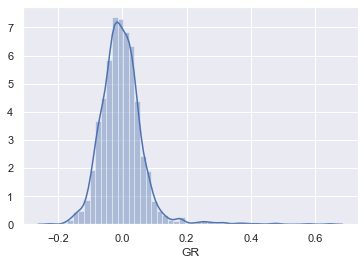

In [220]:
sns.distplot((y_test-y_pred))

# AdaBoostRegressor

In [221]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
train(model, X_train,y_train)
test(model, X_test ,y_test)

Model Report
MSE:  0.00491
RMSE:  0.07009
MAPE:  0.05635
MAE:  0.24344
CV Score:  0.005276009358338731
train_score:  0.45874863678015804
test_score:  0.22703944876365878


In [222]:
result_df = output_deciles(model, X_test, y_test)
result_df

prediction    actual  deciles   Depth
4604    0.257921  0.178063        9  4440.0
1697    0.199698  0.093628        7  2709.5
4647    0.189565  0.182027        6  4471.0
4436    0.151030  0.321196        2  4199.5
2043    0.205284  0.265835        8  2882.5
...          ...       ...      ...     ...
2708    0.199366  0.292992        7  3215.0
146     0.135586  0.026751        0   494.5
3295    0.207496  0.231871        8  3508.5
1802    0.149433  0.053844        2  2762.0
3804    0.126886  0.066899        0  3763.0

[1537 rows x 4 columns]

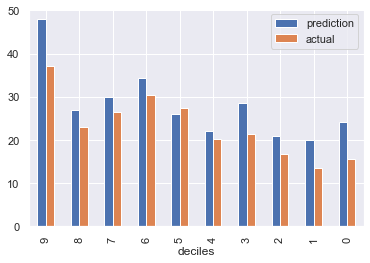

In [223]:
result_df.drop(columns='Depth').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

Text(0.5, 1.0, 'Actual vs. Predicted, Testing Data Set (30% of the data)')

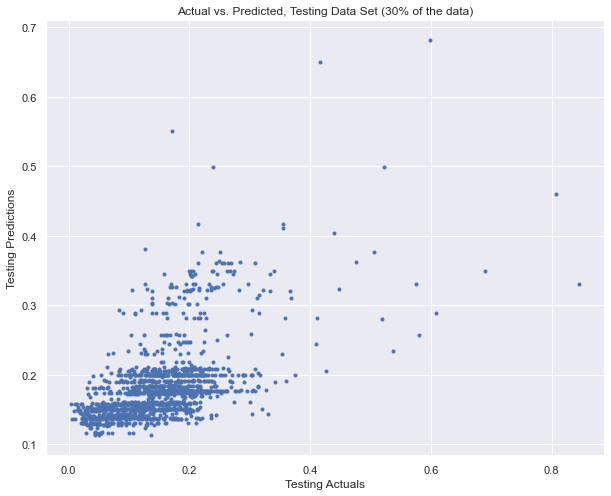

In [224]:
plt.figure(figsize=(10,8))
y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual vs. Predicted, Testing Data Set (30% of the data)')

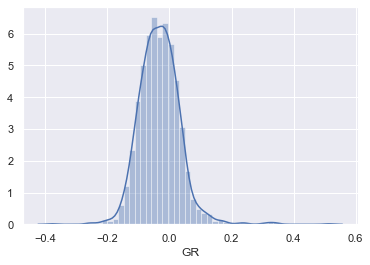

In [225]:
sns.distplot((y_test-y_pred))